## Boxplots to study trends with categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
gap_url = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/gapminder.tsv'

gap_df = pd.read_csv(gap_url, sep='\t')

In [3]:
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


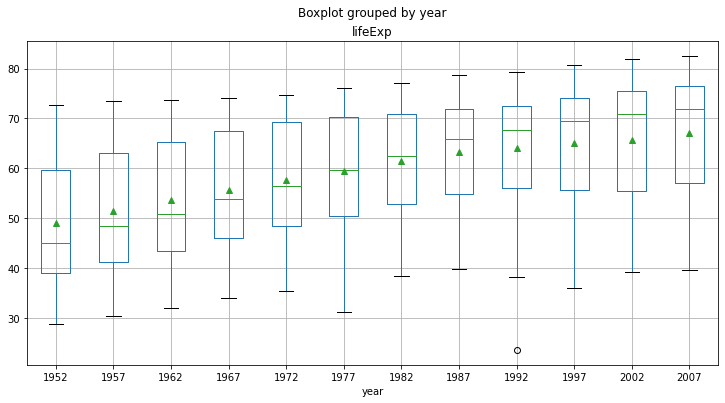

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.boxplot(ax=ax, column=['lifeExp'], showmeans=True, by='year')

plt.show()

Let's make this boxplot in Seaborn, using the FIGURE level function `sns.catplot()` so we will have to specify the `kind` argument to be `'box'`.

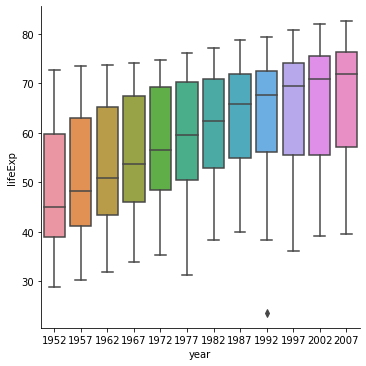

In [5]:
sns.catplot(data=gap_df,
           x='year',
           y='lifeExp',
           kind='box')

plt.show()

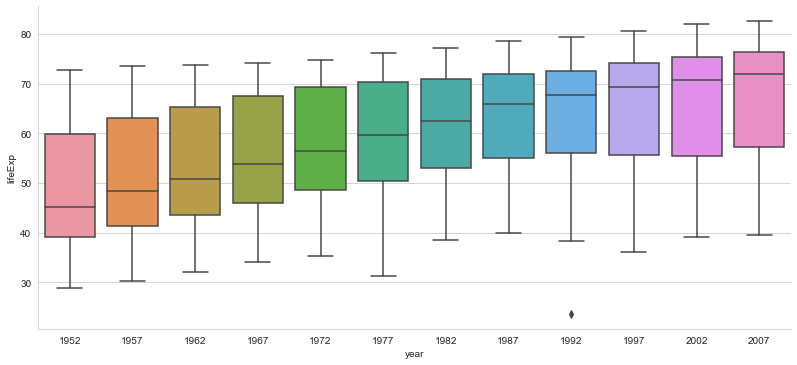

In [6]:
sns.set_style('whitegrid')

sns.catplot(data=gap_df,
           x='year',
           y='lifeExp',
           kind='box',
           aspect=2.2)

plt.show()

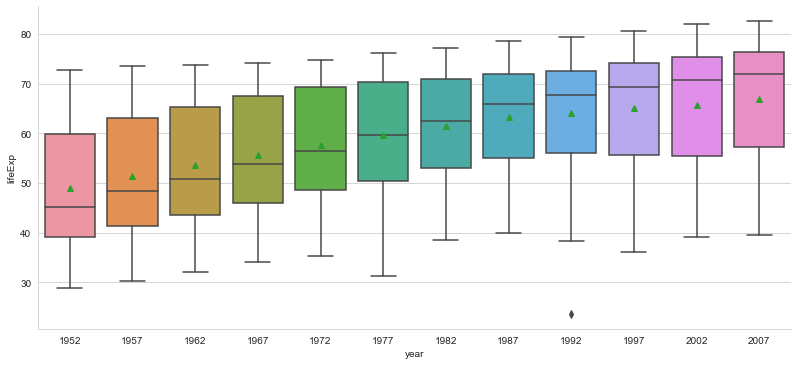

In [7]:
sns.catplot(data=gap_df,
           x='year',
           y='lifeExp',
           kind='box',
            showmeans=True,
           aspect=2.2)

plt.show()

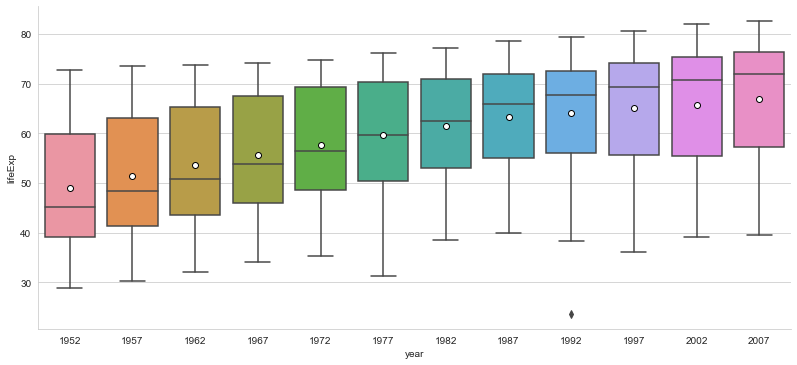

In [8]:
sns.catplot(data=gap_df,
           x='year',
           y='lifeExp',
           kind='box',
            showmeans=True,
            meanprops={'marker':'o',
                      'markerfacecolor':'white',
                      'markeredgecolor':'black'},
           aspect=2.2)

plt.show()

Use Seaborn to breakup the figure or GROUPBY additional variables.

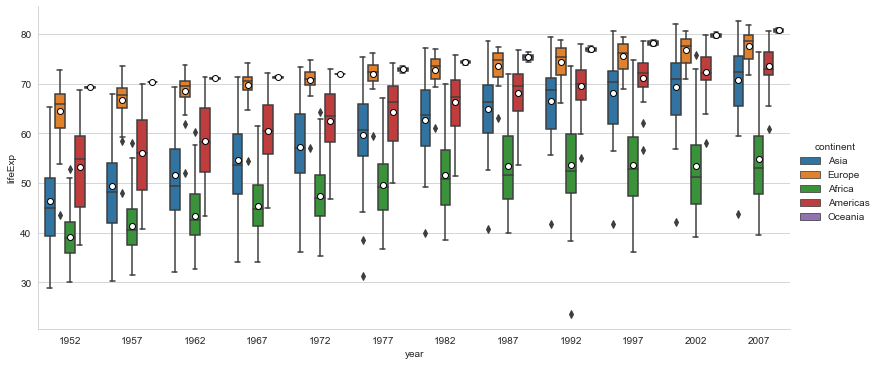

In [10]:
sns.catplot(data=gap_df, x='year', y='lifeExp', hue='continent',
           kind='box',
           showmeans=True,
           meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black'},
           aspect=2.2)

plt.show()

Use separate FACETS to represent the `continent` unique values.

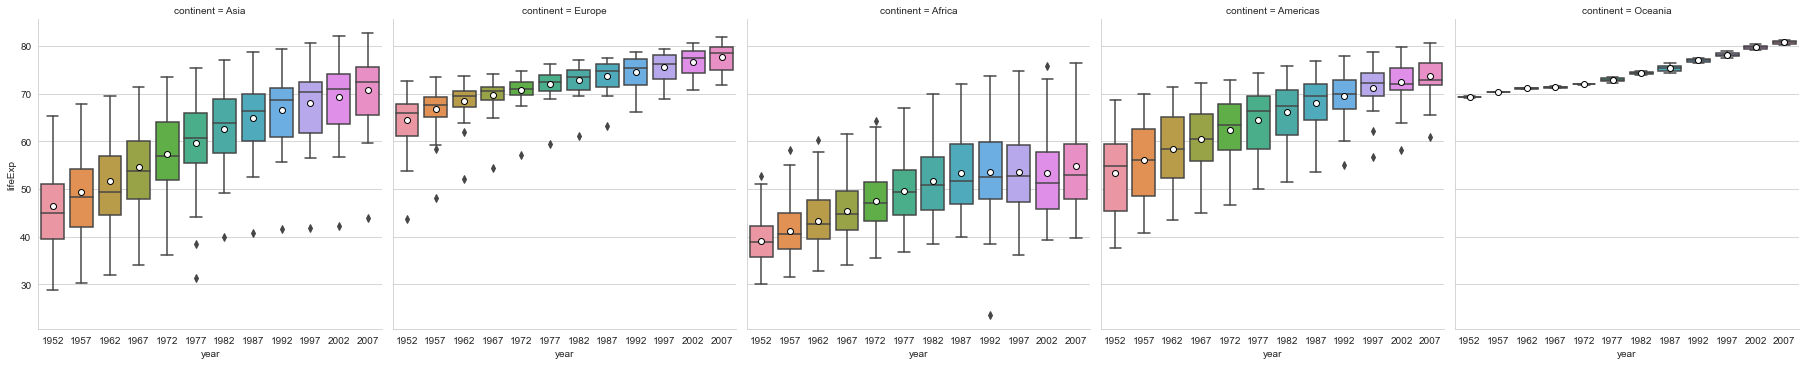

In [13]:
sns.catplot(data=gap_df, x='year', y='lifeExp', col='continent',
           kind='box',
           showmeans=True,
           meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black'})

plt.show()

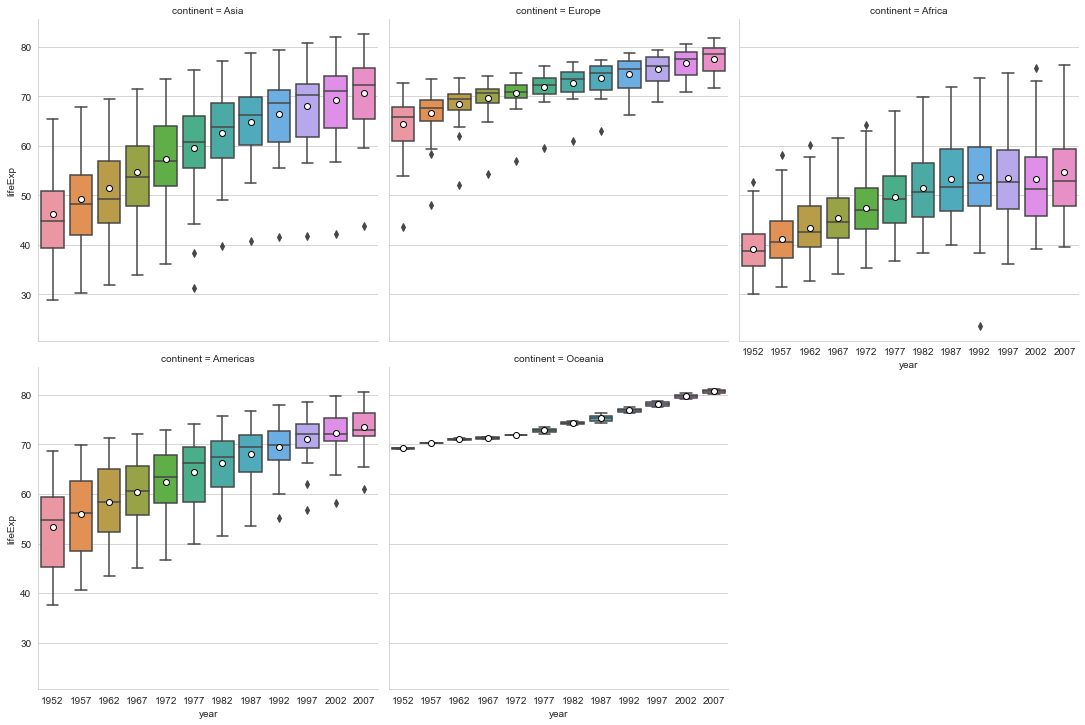

In [15]:
sns.catplot(data=gap_df, x='year', y='lifeExp', col='continent',
            col_wrap=3,
           kind='box',
           showmeans=True,
           meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black'})

plt.show()

Include the average value per year and the standard error as represented by the confidence interval on the mean.

Continue to use the boxplot, but with the AXES level `sns.boxplot()`, and study the average using the `sns.pointplot()`.

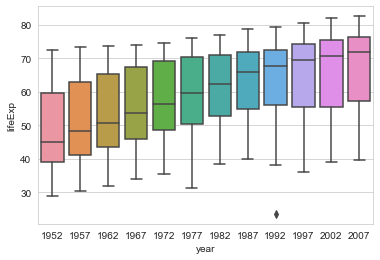

In [16]:
ax = sns.boxplot(data=gap_df, x='year', y='lifeExp')

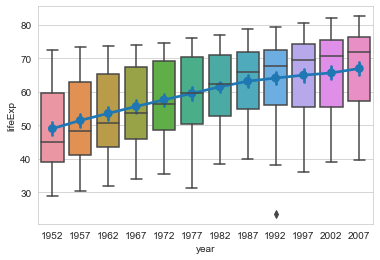

In [17]:
ax = sns.boxplot(data=gap_df, x='year', y='lifeExp')
ax = sns.pointplot(data=gap_df, x='year', y='lifeExp')

Let's now focus just on the average, show how to use the point plot but through `sns.catplot()`.

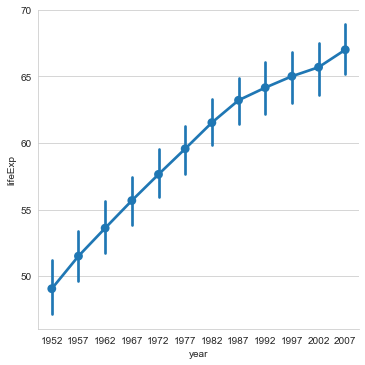

In [18]:
sns.catplot(data=gap_df, x='year', y='lifeExp', kind='point')

plt.show()

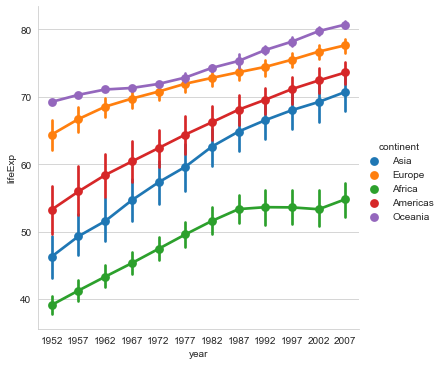

In [19]:
sns.catplot(data=gap_df, x='year', y='lifeExp', hue='continent', kind='point')

plt.show()

## Limitation of boxplots

Use the `diamonds` data set rather `gapminder`.

In [20]:
diamonds = sns.load_dataset('diamonds')

In [21]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [22]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [23]:
diamonds.describe(include='category')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


How does `price` vary with the `color` of the diamond?

In [24]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

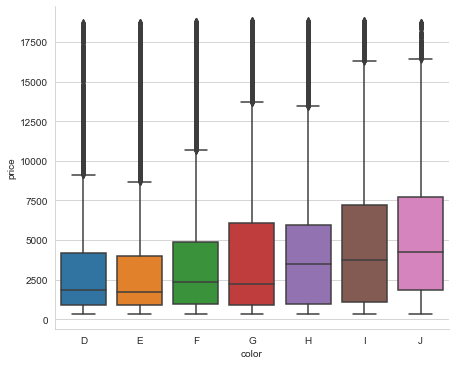

In [25]:
sns.catplot(data=diamonds, x='color', y='price', kind='box', aspect=1.25)

plt.show()

What does the shape of the distribution look like at each unique value of `color`?

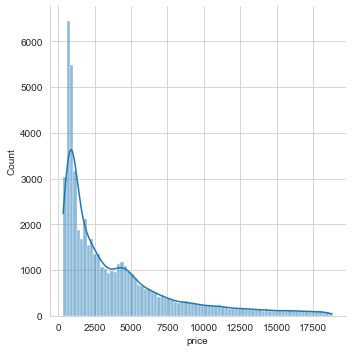

In [26]:
sns.displot(data=diamonds, x='price', kde=True)

plt.show()

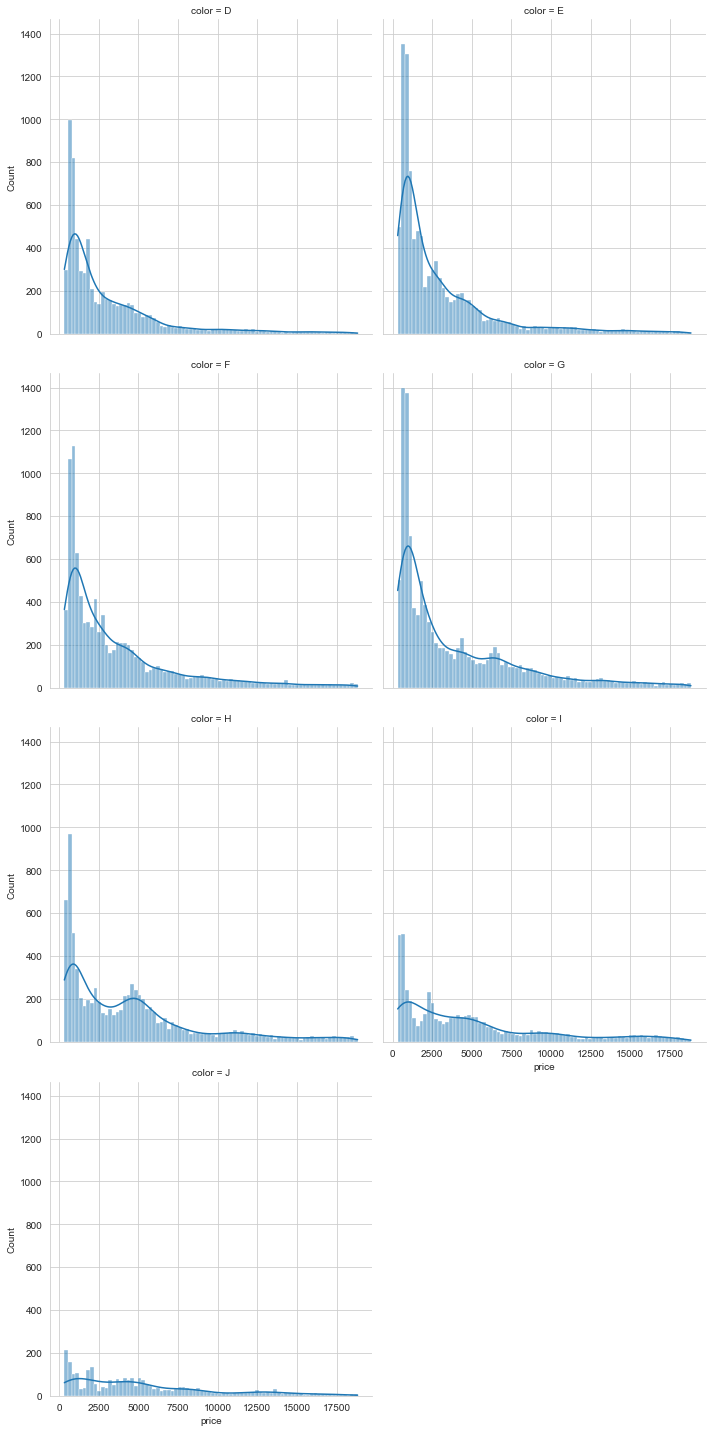

In [27]:
sns.displot(data=diamonds, x='price', col='color', kde=True,
           col_wrap=2)

plt.show()

Use VIOLIN plots to study the distribution per category.

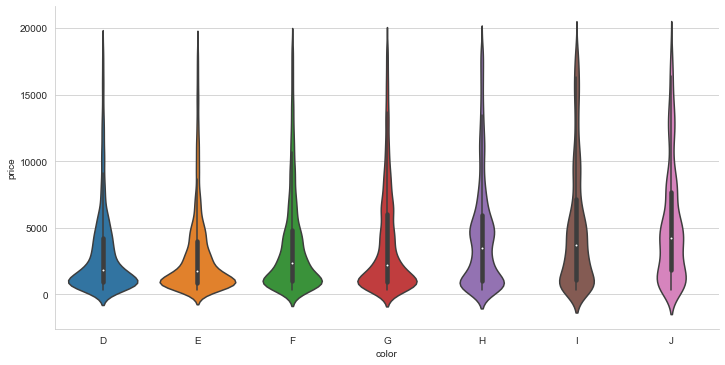

In [29]:
sns.catplot(data=diamonds, x='color', y='price', kind='violin', aspect=2)

plt.show()

`carat` is the size or weight of the diamond, the larger the `carat` the more expensive it's going to be. Let's bin or categorize hte `carat` based on its median value.

In [30]:
diamonds.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [31]:
diamonds['carat_bin'] = pd.qcut(diamonds['carat'], q=2)

In [32]:
diamonds.carat_bin.value_counts()

(0.199, 0.7]    27162
(0.7, 5.01]     26778
Name: carat_bin, dtype: int64

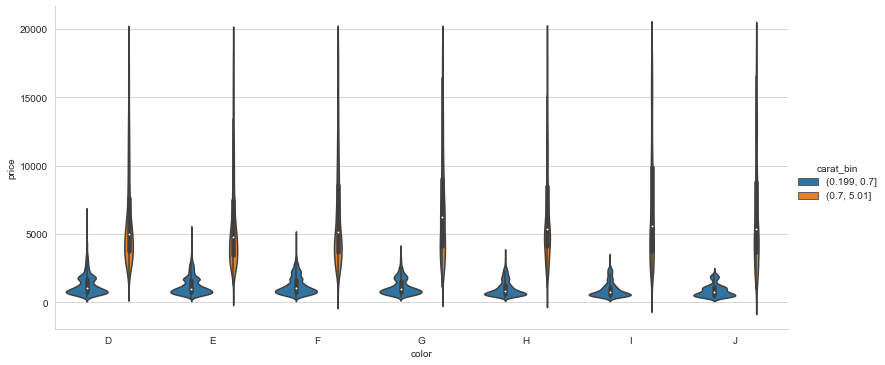

In [33]:
sns.catplot(data=diamonds, x='color', y='price', hue='carat_bin', kind='violin', aspect=2.2)

plt.show()

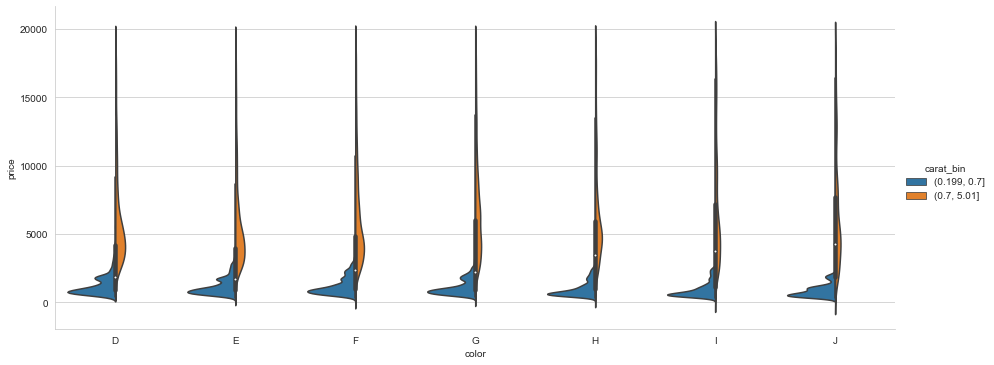

In [36]:
sns.catplot(data=diamonds, x='color', y='price', hue='carat_bin', kind='violin', 
            split=True,
            aspect=2.5)

plt.show()

Study the behavior of hte average useing point plot.

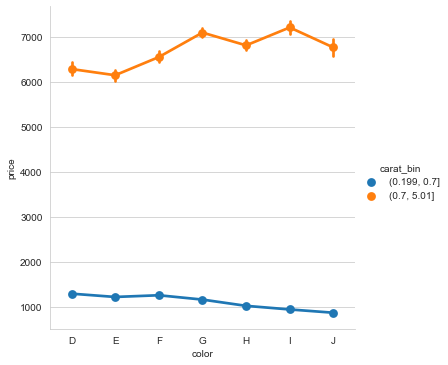

In [37]:
sns.catplot(data=diamonds, x='color', y='price', hue='carat_bin', kind='point')

plt.show()

In [38]:
diamonds['carat_bin_4'] = pd.qcut(diamonds['carat'], q=4)

In [39]:
diamonds.carat_bin_4.value_counts()

(0.199, 0.4]    14391
(0.7, 1.04]     13399
(1.04, 5.01]    13379
(0.4, 0.7]      12771
Name: carat_bin_4, dtype: int64

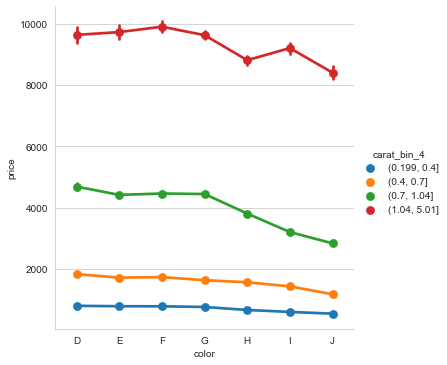

In [40]:
sns.catplot(data=diamonds, x='color', y='price', hue='carat_bin_4', kind='point')

plt.show()